In [1]:
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


In [2]:
np.random.seed(1024)

In [3]:
nsample = 50
x = np.linspace(0, 20, nsample)
X = np.column_stack((x, (x)**2))
X = sm.add_constant(X)
beta = [5., 0.5, 0.02]
sig = 0.5
#w=np.ones(len(x))
#w[25:]=8
w=np.linspace(1,10,len(x))
y_true = np.dot(X, beta)
e = np.random.normal(size=nsample)
y = y_true + sig * w * e
#X = X[:,[0,1]]

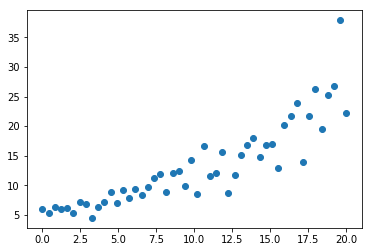

In [4]:
plt.scatter(x,y)

In [5]:
mod_wls = sm.WLS(y, X, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.870
Model:                            WLS   Adj. R-squared:                  0.865
Method:                 Least Squares   F-statistic:                     157.5
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           1.47e-21
Time:                        11:01:27   Log-Likelihood:                -105.65
No. Observations:                  50   AIC:                             217.3
Df Residuals:                      47   BIC:                             223.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.7919      0.282     20.552      0.0

In [7]:
model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     110.8
Date:                Sat, 19 Sep 2020   Prob (F-statistic):           1.61e-18
Time:                        11:02:38   Log-Likelihood:                -124.30
No. Observations:                  50   AIC:                             254.6
Df Residuals:                      47   BIC:                             260.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.3276      1.223      5.175      0.0

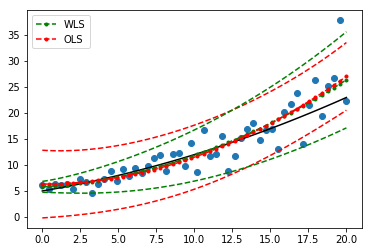

In [8]:
plt.scatter(x,y)
plt.plot(x,y_true,c='k')
plt.plot(x, res_wls.fittedvalues, 'g--.', label="WLS")
plt.plot(x, results.fittedvalues, 'r--.', label="OLS")
prstd, iv_l, iv_u = wls_prediction_std(results)
plt.plot(x, iv_u, 'r--')
plt.plot(x, iv_l, 'r--')

prstd, iv_l, iv_u = wls_prediction_std(res_wls)
plt.plot(x, iv_u, 'g--')
plt.plot(x, iv_l, 'g--')
plt.legend()